# Poisonous Mushrooms Classification
This project involves building a machine learning model to classify mushrooms as either edible or poisonous based on their physical characteristics. The dataset used for this project is the one provided by the Kaggle "Binary Prediction of Poisonous Mushrooms" competition (link [here](https://www.kaggle.com/competitions/playground-series-s4e8/overview)).

## Environment Settings

In [1]:
import os
import subprocess
import pandas as pd

In [2]:
# ==== CONFIG ====
COMPETITION_NAME = "playground-series-s4e8"
DIR_PATH = "data"
# =================

# Ensure Kaggle API key is set up
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")

if "COLAB_RELEASE_TAG" in os.environ:
    from google.colab import files
    if not os.path.exists(kaggle_json_path):
        print("Please upload your kaggle.json file (from https://www.kaggle.com/settings).")
        uploaded = files.upload()
        os.makedirs(os.path.dirname(kaggle_json_path), exist_ok=True)
        os.rename("kaggle.json", kaggle_json_path)
else:
    if not os.path.exists(kaggle_json_path):
        raise FileNotFoundError(
            f"❌ Kaggle API key not found at {kaggle_json_path}.\n"
            f"Please place your kaggle.json there."
        )

os.chmod(kaggle_json_path, 0o600)
print("✅ Kaggle API configured.")

# Ensure Kaggle CLI is installed
try:
    subprocess.run(["kaggle", "--version"], check=True, capture_output=True)
except Exception:
    print("Installing Kaggle CLI...")
    subprocess.run(["pip", "install", "-q", "kaggle"], check=True)

# Make data directory
os.makedirs(DIR_PATH, exist_ok=True)

# Skip if data already exists
if len(os.listdir(DIR_PATH)) > 0:
    print(f"📁 Data already exists in '{DIR_PATH}', skipping download.")
else:
    print(f"⬇️ Downloading '{COMPETITION_NAME}' dataset to '{DIR_PATH}'...")
    subprocess.run(["kaggle", "competitions", "download", "-c", COMPETITION_NAME, "-p", DIR_PATH], check=True)

    # Unzip any archives
    for file in os.listdir(DIR_PATH):
        if file.endswith(".zip"):
            zip_path = os.path.join(DIR_PATH, file)
            print(f"📦 Extracting {file}...")
            subprocess.run(["unzip", "-q", "-o", zip_path, "-d", DIR_PATH])
            os.remove(zip_path)
    print("✅ Download complete!")


Please upload your kaggle.json file (from https://www.kaggle.com/settings).


Saving kaggle.json to kaggle.json
✅ Kaggle API configured.
⬇️ Downloading 'playground-series-s4e8' dataset to 'data'...
📦 Extracting playground-series-s4e8.zip...
✅ Download complete!


## Data

In [3]:
train = pd.read_csv(f'{DIR_PATH}/train.csv')
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
test = pd.read_csv(f'{DIR_PATH}/test.csv')
test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

Since we don't have an explicit data dictionary provided, here's a brief and hypothetical description of the columns based on common mushrooms features:
- `Id`: Unique identifier for each mushroom sample.
- `class`: Target variable indicating whether the mushroom is edible (`e`) or poisonous (`p`).
- `cap-diameter`: Diameter of the mushroom cap in centimeters.
- `cap-shape`: Shape of the mushroom cap.
- `cap-surface`: Surface texture of the mushroom cap.
- `cap-color`: Color of the mushroom cap.
- `does-bruise-or-bleed`: Indicates if the mushroom bruises or bleeds when handled.
- `gill-attachment`: Attachment type of the gills to the stem.
- `gill-spacing`: Spacing of the gills.
- `gill-color`: Color of the gills.
- `stem-height`: Height of the mushroom stem in centimeters.
- `stem-width`: Width of the mushroom stem in centimeters.
- `stem-root`: Type of root structure of the stem.
- `stem-surface`: Surface texture of the stem.
- `stem-color`: Color of the stem.
- `veil-type`: Type of veil covering the mushroom.
- `veil-color`: Color of the veil.
- `has-ring`: Indicates if the mushroom has a ring around the stem.
- `ring-type`: Type of ring around the stem.
- `spore-print-color`: Color of the spore print.
- `habitat`: Natural habitat where the mushroom is found.
- `season`: Season when the mushroom is typically found.

## Data Cleaning

The following data cleaning steps were performed both on train and test set:
1. **Set Index**: The `id` column was set as the index to facilitate easier data manipulation.

In [6]:
train = train.set_index('id')
test = test.set_index('id')

2. **Category Cleaning**: Categorical variables were inspected for inconsistencies such as typos or unexpected values. Any anomalies were corrected to ensure format uniformity across the datasets (categories with less than 1% frequency were assigned to nan).

In [7]:
numerical = ['cap-diameter', 'stem-height', 'stem-width']
categorical = [column for column in train.columns if column not in numerical and column != 'class']
target = 'class'

In [8]:
counting = train[categorical].nunique().reset_index(name = 'Old').set_index('index')
counting

,Old
index,
cap-shape,74
cap-surface,83
cap-color,78
does-bruise-or-bleed,26
gill-attachment,78
gill-spacing,48
gill-color,63
stem-root,38
stem-surface,60


In [9]:
import numpy as np

def valid_categories(df, threshold = 0.01):
    valid_cats = dict()
    for column in df:
        freq = df[column].value_counts(normalize = True)
        valid_cats[column] = freq[freq >= threshold].index
    return valid_cats

def clean_categories(df, valid_cats):
    for col, valid in valid_cats.items():
        df.loc[:, col] = df[col].where(df[col].isin(valid), np.nan)
    return df

In [10]:
valid_cats = valid_categories(train[categorical])

train[categorical] = clean_categories(train[categorical], valid_cats)
test[categorical] = clean_categories(test[categorical], valid_cats)

In [11]:
counting['New'] = train[categorical].nunique()
counting

,Old,New
index,,
cap-shape,74,7
cap-surface,83,11
cap-color,78,12
does-bruise-or-bleed,26,2
gill-attachment,78,7
gill-spacing,48,3
gill-color,63,12
stem-root,38,4
stem-surface,60,7


3. **Missing Values**: First handling of Missing values in the dataset was performed. This involved identifying columns with missing values and deciding on an appropriate strategy to handle them (e.g., imputation, removal).

In [12]:
(train.isna().sum() / train.shape[0]).sort_values(ascending = False)

,0
veil-type,0.948869
spore-print-color,0.914311
stem-root,0.884778
veil-color,0.879415
stem-surface,0.635805
gill-spacing,0.403786
cap-surface,0.215475
gill-attachment,0.168254
ring-type,0.042757
habitat,0.013303


Missing values in veil-related features: we interpreted with 'missing' when both `veil-color` and `veil-type` are nan, intepreting it as "missing veil":

In [13]:
print(f'Before Imputing:\n{((train.isna().sum() / train.shape[0]).sort_values(ascending = False))[['veil-color', 'veil-type']]}\n')

mask = train['veil-color'].isna() & train['veil-type'].isna()
train.loc[mask, ['veil-color', 'veil-type']] = train.loc[mask, ['veil-color', 'veil-type']].fillna('missing')

mask = test['veil-color'].isna() & test['veil-type'].isna()
test.loc[mask, ['veil-color', 'veil-type']] = test.loc[mask, ['veil-color', 'veil-type']].fillna('missing')

del mask # To free-up RAM usage

print(f'After Imputing with "missing":\n{((train.isna().sum() / train.shape[0]).sort_values(ascending = False))[['veil-color', 'veil-type']]}')

Before Imputing:
veil-color    0.879415
veil-type     0.948869
dtype: float64

After Imputing with "missing":
veil-color    0.000038
veil-type     0.069492
dtype: float64


By doing so, the proportion of nan dropped significantly, so we'll impute the remaining with median (this will be done later in a pipeline).

Missing values in `spore-print-color`: considering the very high proportion and the absence of any other feature from which to draw the meaning of this missingness, we'll impute with "missing" string and see if the feature is helpful in modeling.

In [14]:
train['spore-print-color'] = train['spore-print-color'].fillna('missing')
test['spore-print-color'] = test['spore-print-color'].fillna('missing')

Missing values in stem-related features were analyzed: we impute 'missing' when `stem-root`, `stem-color`, `stem-surface` are nan and `stem-width` and `stem-height` are 0.

In [15]:
print(f'Before Imputing:\n{((train.isna().sum() / train.shape[0]).sort_values(ascending = False))[[x for x in train.columns if 'stem' in x]]}\n')

mask = train['stem-root'].isna() & train['stem-color'].isna() & train['stem-surface'].isna() & (train['stem-width'] == 0) & (train['stem-height'] == 0)
train.loc[mask, ['stem-root', 'stem-color', 'stem-surface']] = train.loc[mask, ['stem-root', 'stem-color', 'stem-surface']].fillna('missing')

mask = test['stem-root'].isna() & test['stem-color'].isna() & test['stem-surface'].isna() & (test['stem-width'] == 0) & (test['stem-height'] == 0)
test.loc[mask, ['stem-root', 'stem-color', 'stem-surface']] = test.loc[mask, ['stem-root', 'stem-color', 'stem-surface']].fillna('missing')

del mask

print(f'After Imputing with "missing":\n{((train.isna().sum() / train.shape[0]).sort_values(ascending = False))[[x for x in train.columns if 'stem' in x]]}')

Before Imputing:
stem-height     0.000000
stem-width      0.000000
stem-root       0.884778
stem-surface    0.635805
stem-color      0.013012
dtype: float64

After Imputing with "missing":
stem-height     0.000000
stem-width      0.000000
stem-root       0.884642
stem-surface    0.635669
stem-color      0.012876
dtype: float64


In this case the proportion of missingness is still very high. For now, we'll impute with "missing" in all these remaining cases, but we might consider dropping these features later if they don't prove useful in modeling.

In [16]:
for x in [x for x in train.columns if 'stem' in x]:
  # Skip height and weight
  if x in ['stem-height', 'stem-width']:
    continue
  train[x] = train[x].fillna('missing')
  test[x] = test[x].fillna('missing')

Missing values in gill-related features: `gil-color` has already a low proportion of missing values, so we'll just try to impute in `gill-attachment` and `gill-spacing` considering other gill-related features.

In [17]:
print(f'Before Imputing:\n{((train.isna().sum() / train.shape[0]).sort_values(ascending = False))[[x for x in train.columns if 'gill' in x and x != 'gill-color']]}\n')

mask = train['gill-attachment'].isna() & train['gill-spacing'].isna()
train.loc[mask, ['gill-attachment', 'gill-spacing']] = train.loc[mask, ['gill-attachment', 'gill-spacing']].fillna('missing')

mask = test['gill-attachment'].isna() & test['gill-spacing'].isna()
test.loc[mask, ['gill-attachment', 'gill-spacing']] = test.loc[mask, ['gill-attachment', 'gill-spacing']].fillna('missing')

del mask

print(f'After Imputing with "missing":\n{((train.isna().sum() / train.shape[0]).sort_values(ascending = False))[[x for x in train.columns if 'gill' in x and x != 'gill-color']]}')

Before Imputing:
gill-attachment    0.168254
gill-spacing       0.403786
dtype: float64

After Imputing with "missing":
gill-attachment    0.086633
gill-spacing       0.322165
dtype: float64


Proportion dropped a bit, but it is still high, especially for `gill-spacing`. For now, we'll impute these with "missing".

In [18]:
for col in [x for x in train.columns if 'gill' in x and x != 'gill-color']:
  train[col] = train[col].fillna('missing')
  test[col] = test[col].fillna('missing')

Missing values in cap-related features: we'll consider just the ones with high proportion of missing values i.e., `cap-surface`. We impute with "missing".

In [19]:
train['cap-surface'] = train['cap-surface'].fillna('missing')
test['cap-surface'] = test['cap-surface'].fillna('missing')

We now have a maximum of missing values proportion of around 7%, which is more acceptable and can be handled later in a pipeline.

In [20]:
((train.isna().sum() / train.shape[0]).sort_values(ascending = False))

,0
veil-type,0.069492
ring-type,0.042757
habitat,0.013303
cap-shape,0.000182
gill-color,0.000158
cap-color,0.000118
has-ring,0.000046
veil-color,0.000038
does-bruise-or-bleed,0.000038
cap-diameter,0.000001


## Data Exploration
We'll now explore our data to understand the distributions of features, relationships between them, and their correlation with the target variable. This will help in feature selection and engineering for building an effective classification model. Considering we have around 3 million rows, which are too much for visualizations and future modeling prototype developing, we will first split our data into a train and held-out validation set:

In [21]:
train_full = train.copy()

In [22]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train, train_size=0.95, stratify=train["class"], random_state=42)

We'll then furtherly sub-sample 20% of the new train set for exploration and modeling prototype developing:

In [23]:
train_sample, _ = train_test_split(train, train_size=0.20, stratify=train["class"], random_state=42)

del train

### Target Exploration
Being this a binary classification task, the target variable is a categorical, most precisely a binary categorical. Let's check if it is unbalanced:

In [24]:
train_sample[target].value_counts(normalize = True)

,proportion
class,
p,0.547137
e,0.452863


We have an approximately balanced variable, which is a good new considering our models will be more likely to generalize well for both classes.

### Categorical Features Exploration
Let's now check for unbalanceness in all others categorical variables:

In [25]:
for column in categorical:
  print(train_sample[column].value_counts(normalize = True), '\n')

cap-shape
x    0.461245
f    0.216228
s    0.117981
b    0.102185
o    0.034602
p    0.034555
c    0.033204
Name: proportion, dtype: float64 

cap-surface
missing    0.215321
t          0.148296
s          0.123853
y          0.104966
h          0.091432
g          0.084303
d          0.066168
k          0.041154
e          0.038273
i          0.035936
w          0.035771
l          0.014527
Name: proportion, dtype: float64 

cap-color
n    0.436740
y    0.123696
w    0.121894
g    0.067733
e    0.062794
o    0.057530
p    0.029379
r    0.024956
u    0.023495
b    0.019829
k    0.019360
l    0.012593
Name: proportion, dtype: float64 

does-bruise-or-bleed
f    0.823842
t    0.176158
Name: proportion, dtype: float64 

gill-attachment
a          0.207579
d          0.189531
missing    0.167528
x          0.115655
e          0.096827
s          0.094995
p          0.089220
f          0.038665
Name: proportion, dtype: float64 

gill-spacing
c          0.426840
missing    0.403520
d        

`does-bruise-or-bleed`, `stem-root`, `stem-surface`, `veil-type`, `has-ring`, `ring-type`, `spore-print-color`, `habitat` have all a relatively dominant category (>60%); most of these dominant categories are the "missing" category we imputed earlier.

### Numerical Feature Exploration
We'll now check for the distribution of our (continuous) numerical variables, using statistics and visualizations:

In [26]:
summary = train_sample[numerical].describe()
summary.loc['vc'] = train_sample[numerical].std() / train_sample[numerical].mean()
summary.T

del summary

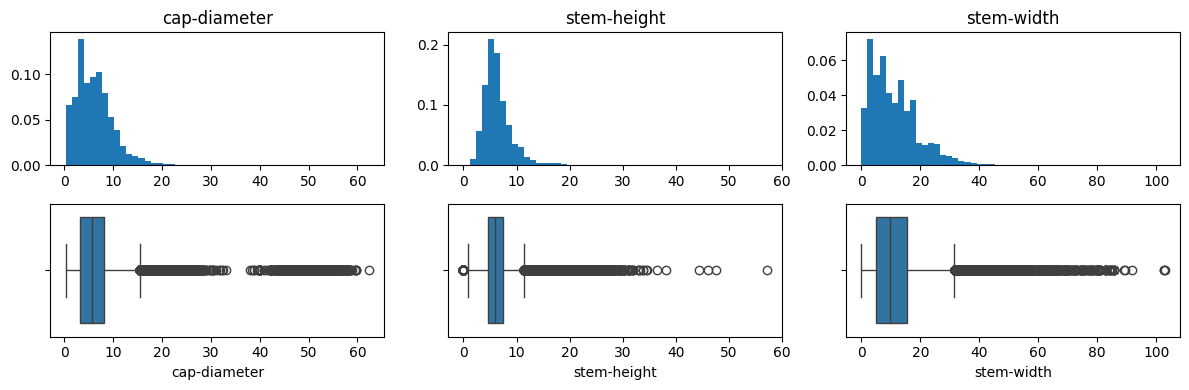

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

for i, col in enumerate(numerical):
    plt.subplot(2, 3, i+1)
    plt.hist(train_sample[col], density=True, bins = 50)
    plt.title(col)

    plt.subplot(2, 3, i+1+3)
    sns.boxplot(x = train_sample[col])

plt.tight_layout()
plt.show()

All 3 variables seem right skewed, with some outliers in the right tail; we'll consider applying a log transformation later in a pipeline to reduce skewness.

### Associations and Correlations
We'll first explore associations between categorical variables and our target variable; for doing so, we'll use both analytical methods (like cross-tabulation) and visual methods (like bar plots).

In [28]:
for col in categorical:
  print(pd.crosstab(train_sample[target], train_sample[col], normalize = True), '\n')

cap-shape         b         c         f         o         p        s         x
class                                                                         
e          0.023140  0.015355  0.105355  0.011288  0.018802  0.05327  0.225653
p          0.079045  0.017849  0.110873  0.023314  0.015753  0.06471  0.235592 

cap-surface         d         e         g         h         i         k  \
class                                                                     
e            0.027010  0.019915  0.033879  0.048435  0.006310  0.004027   
p            0.039158  0.018358  0.050424  0.042998  0.029626  0.037126   

cap-surface         l   missing         s         t         w         y  
class                                                                    
e            0.008387  0.104929  0.077966  0.052928  0.012387  0.056688  
p            0.006140  0.110392  0.045887  0.095368  0.023383  0.048278   

cap-color         b         e         g         k         l         n  \
class     

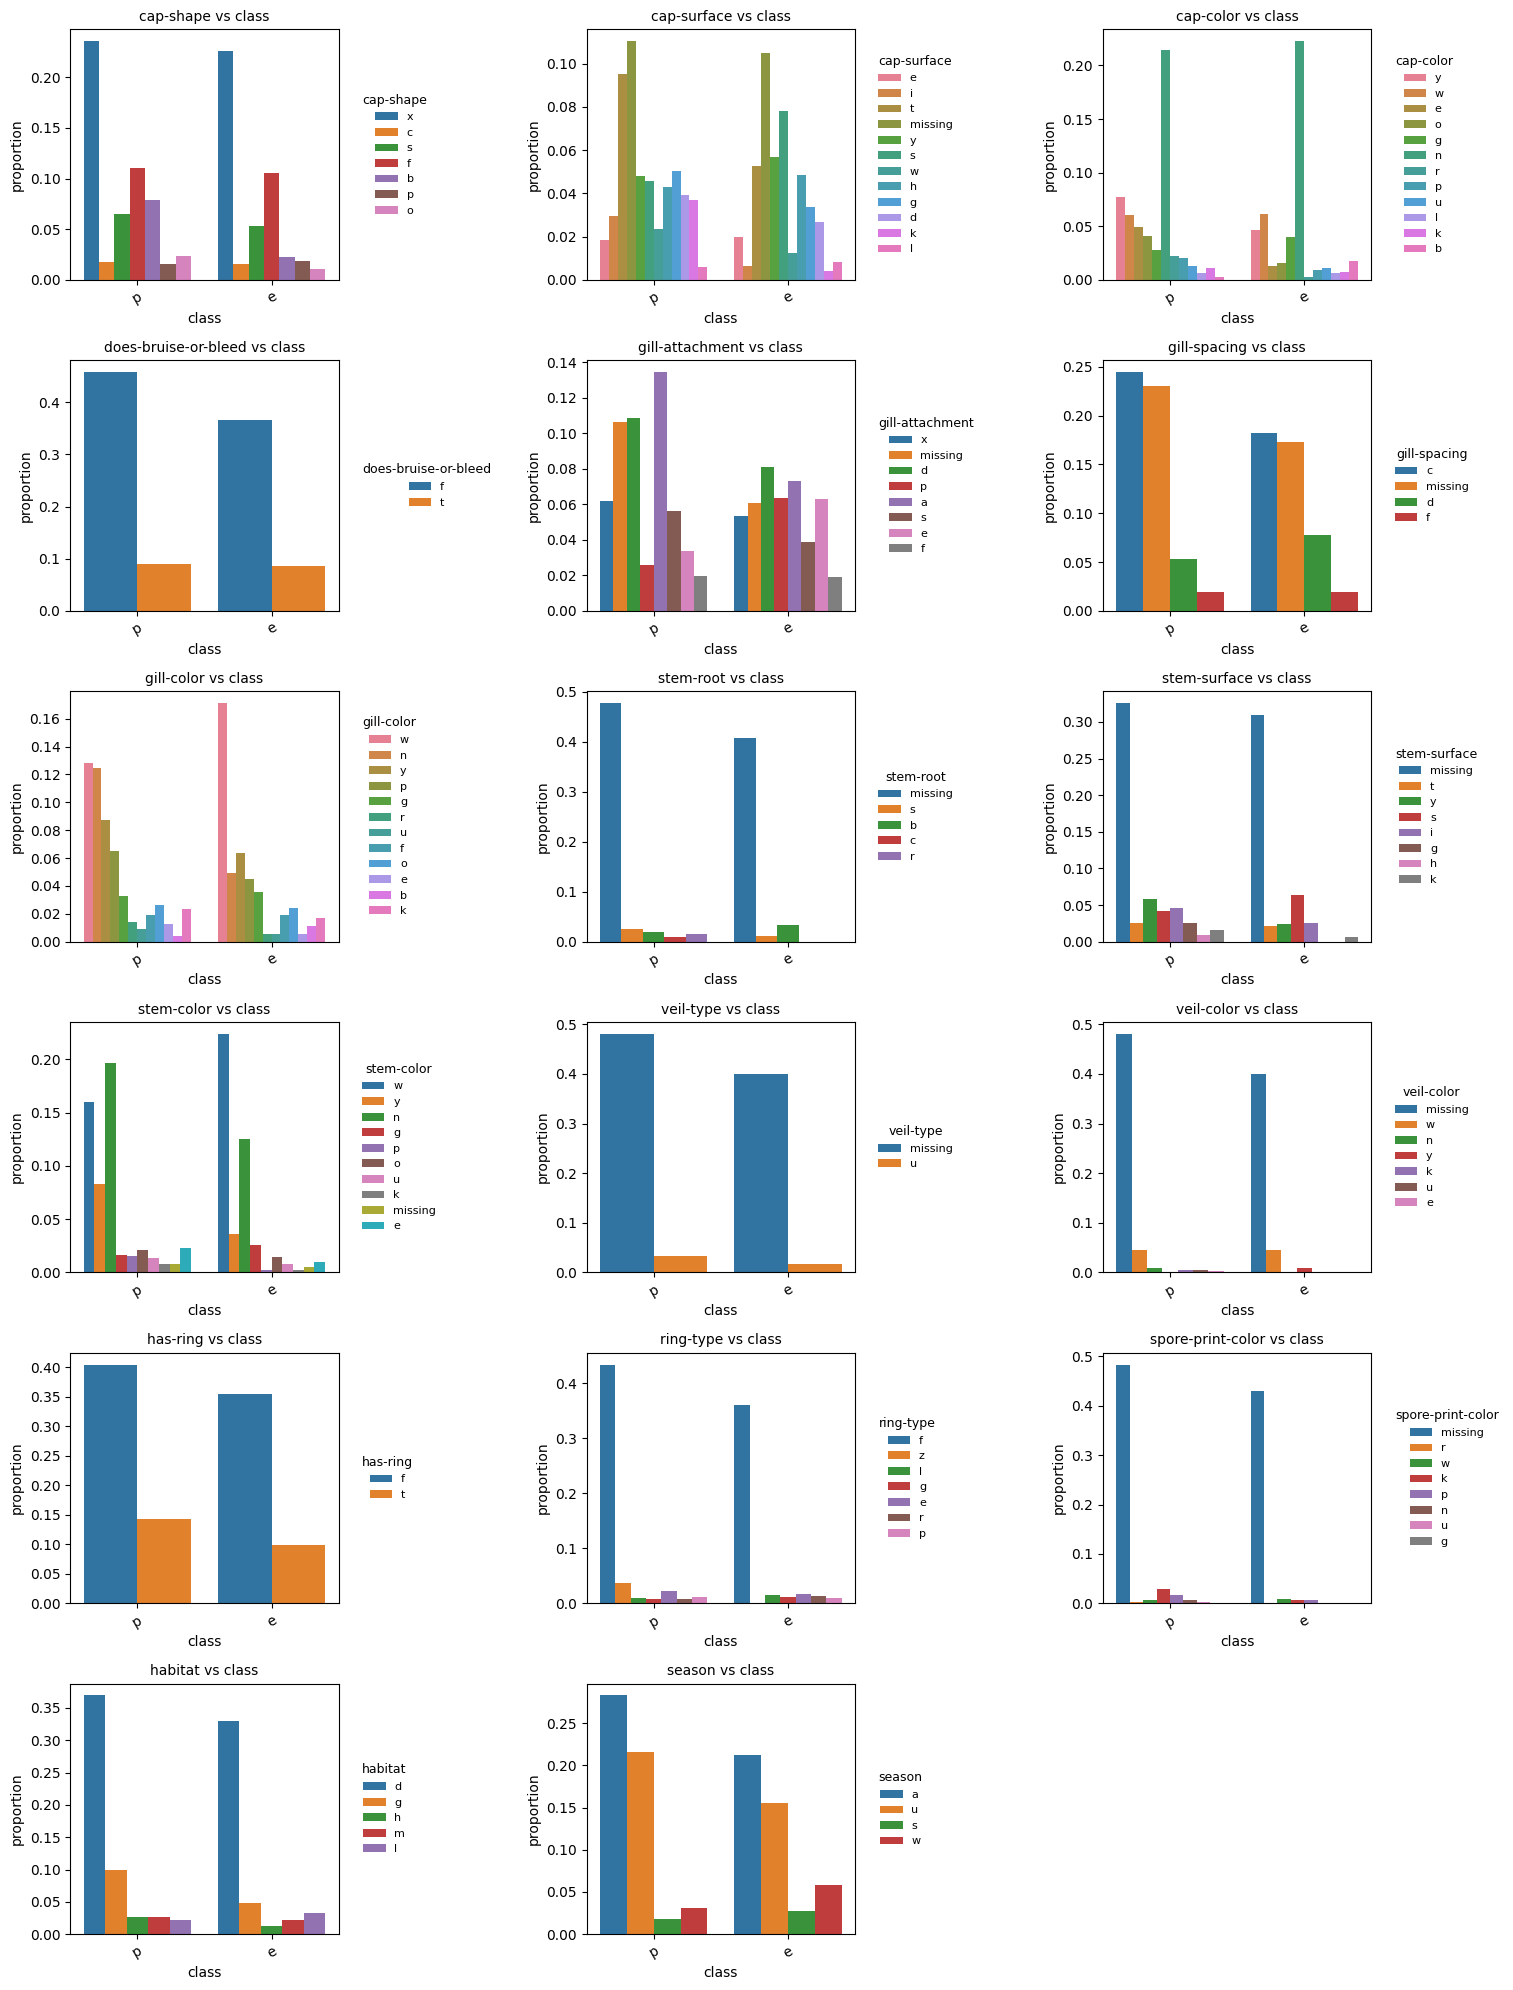

In [29]:
target_order = train_sample[target].value_counts().index

plt.figure(figsize=(18, 20))  # wider and taller figure

for i, col in enumerate(categorical):
    plt.subplot(6, 3, i+1)

    sns.countplot(
        data=train_sample,
        x=target,
        hue=col,
        order=target_order,
        stat = 'proportion'
    )
    plt.legend(
        loc="center left",
        bbox_to_anchor=(1.05, 0.5),  # slightly farther to the right
        title=str(col),
        ncol=1,
        frameon=False,
        fontsize=8,            # smaller legend font
        title_fontsize=9
    )
    plt.title(f"{col} vs {target}", fontsize=10)
    plt.tick_params(axis="x", rotation=30)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room on right for legends
plt.show()


`cap-surface`, `gill-attachment`, `stem-root`, `stem-surface`, `stem-color`, `ring-type` seem the one with most heterogeneous behaviors between poisonous and edible mushrooms.

In [30]:
for col in numerical:
  print(train_sample.groupby(target)[col].median(), '\n')

class
e    6.53
p    4.66
Name: cap-diameter, dtype: float64 

class
e    6.07
p    5.62
Name: stem-height, dtype: float64 

class
e    12.05
p     7.23
Name: stem-width, dtype: float64 



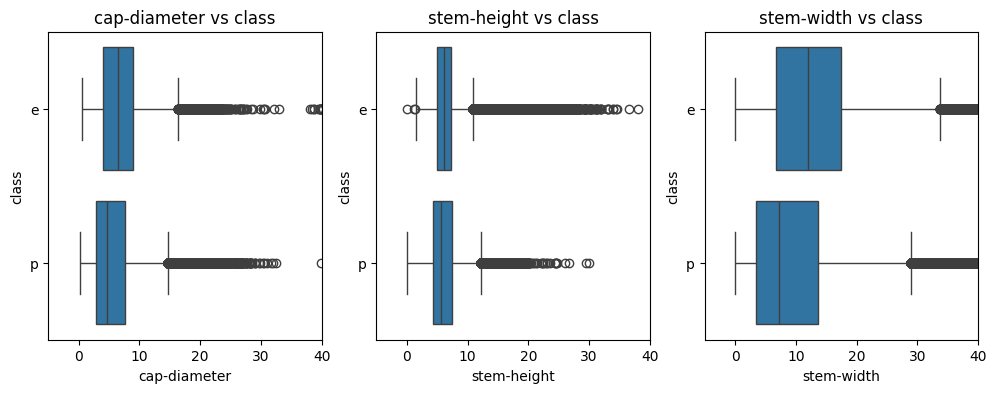

In [31]:
plt.figure(figsize = (12, 4))

for i, col in enumerate(numerical):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=train_sample,
        x = col,
        y=target
    )

    plt.title(f"{col} vs {target}")
    plt.xlim((-5, 40))

plt.show()

Eadible mushrooms seem to be, on average, bigger mushrooms, in both terms of cap diameter, stem height and width, especially for this last feature.

Consider the strong skews and the presence of outliers, let's check if the log transformation of these features is better for modeling:

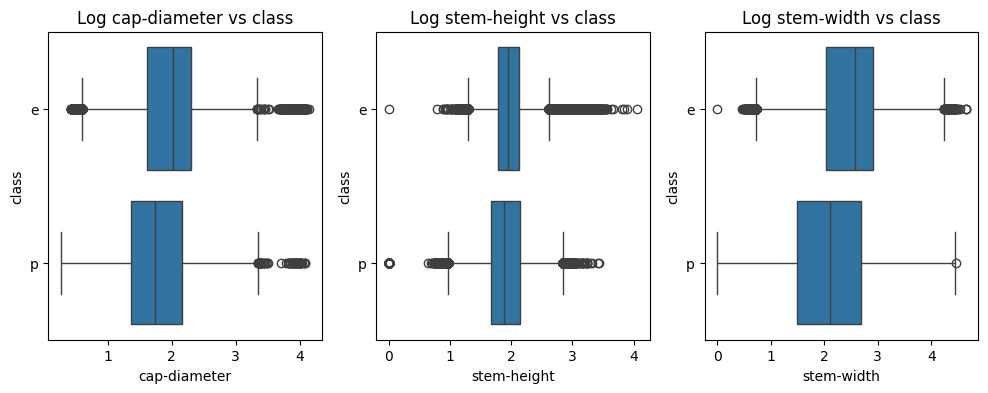

In [32]:
plt.figure(figsize = (12, 4))

for i, col in enumerate(numerical):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        x = np.log1p(train_sample[col]),
        y = train_sample[target]
    )

    plt.title(f"Log {col} vs {target}")

plt.show()

It does, considering we reduce by a lot the influence of outliers: we will consider applying log in our pipeline.

## Data Modeling

As we said before, considering we have around 3 million data points, we will start by train models just on the sample we extracted; we will also not consider high computational complexity models, such as kNN, Kernelized SVM or Random Forest.

Let's define our features and target:

In [33]:
X_train = train_sample.drop(columns = 'class')
y_train = train_sample['class']

X_valid = valid.drop(columns = 'class')
y_valid = valid['class']

del train_sample
del valid

### Preprocessing Pipeline
We did an initial data cleaning phase in which we took data into a more processable format for analysis. Now we must take data to a format processable by ML algorithms, which means to take care of all the missing values, scale all the numerical variables and encode all the categorical ones. For doing so we'll initialize a *ColumnTransformer*:

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

numerical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('log1p', FunctionTransformer(np.log1p, validate = False)),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_preprocessor, numerical),
    ('categorical', categorical_preprocessor, categorical)
])

### Logistic Regression
We'll first try a simple Logistic Regression model as a baseline model for our classification task. Since we will later deal with lot of data, we'll implement the model using stochastic gradient descent with the `SGDClassifier` class from `sklearn`, which is optimized for large datasets.

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, matthews_corrcoef

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SGDClassifier(loss = 'log_loss', random_state = 42))
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print(f"Training MCC: {matthews_corrcoef(y_train, y_pred_train):.2f}\n")

print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))
print(f"Validation MCC: {matthews_corrcoef(y_valid, y_pred_valid):.2f}")

Training Classification Report:
              precision    recall  f1-score   support

           e       0.82      0.87      0.84    268194
           p       0.89      0.84      0.86    324025

    accuracy                           0.85    592219
   macro avg       0.85      0.85      0.85    592219
weighted avg       0.85      0.85      0.85    592219

Training MCC: 0.71

Validation Classification Report:
              precision    recall  f1-score   support

           e       0.82      0.87      0.84     70578
           p       0.88      0.84      0.86     85270

    accuracy                           0.85    155848
   macro avg       0.85      0.85      0.85    155848
weighted avg       0.85      0.85      0.85    155848

Validation MCC: 0.70


### Linear Support Vector Machine Classifier
We'll now try a Linear Support Vector Machine Classifier, which is another linear model but that optimizes the margin between classes instead of the log-loss; as for Logistic Regression, we'll use the `SGDClassifier` class from `sklearn` to implement it.

In [36]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SGDClassifier(loss = 'hinge', random_state = 42))
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print(f"Training MCC: {matthews_corrcoef(y_train, y_pred_train):.2f}\n")

print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))
print(f"Validation MCC: {matthews_corrcoef(y_valid, y_pred_valid):.2f}")

Training Classification Report:
              precision    recall  f1-score   support

           e       0.84      0.85      0.85    268194
           p       0.88      0.86      0.87    324025

    accuracy                           0.86    592219
   macro avg       0.86      0.86      0.86    592219
weighted avg       0.86      0.86      0.86    592219

Training MCC: 0.72

Validation Classification Report:
              precision    recall  f1-score   support

           e       0.84      0.85      0.85     70578
           p       0.88      0.86      0.87     85270

    accuracy                           0.86    155848
   macro avg       0.86      0.86      0.86    155848
weighted avg       0.86      0.86      0.86    155848

Validation MCC: 0.72


### Decision Tree Classifier
We'll now try a Decision Tree Classifier, which is a non-linear model that can capture complex relationships between features and the target variable. Decision Trees are also interpretable, allowing us to understand the decision-making process of the model. We'll use the `DecisionTreeClassifier` class from `sklearn` to implement it.

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state = 42))
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print(f"Training MCC: {matthews_corrcoef(y_train, y_pred_train):.2f}\n")

print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))
print(f"Validation MCC: {matthews_corrcoef(y_valid, y_pred_valid):.2f}")

Training Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00    268194
           p       1.00      1.00      1.00    324025

    accuracy                           1.00    592219
   macro avg       1.00      1.00      1.00    592219
weighted avg       1.00      1.00      1.00    592219

Training MCC: 1.00

Validation Classification Report:
              precision    recall  f1-score   support

           e       0.98      0.98      0.98     70578
           p       0.98      0.98      0.98     85270

    accuracy                           0.98    155848
   macro avg       0.98      0.98      0.98    155848
weighted avg       0.98      0.98      0.98    155848

Validation MCC: 0.96


With this sub-sampled dataset, the Decision Tree Classifier achieves a Validation MCC of 0.96, which is impressive; we will keep this algorithm in mind for future developments on the full dataset.

As we said before, Decision Trees are interpretable models; let's understand which features were the most important according to our trained model (for a tree-based model, importance is the total reduction of impurity brought by that feature):

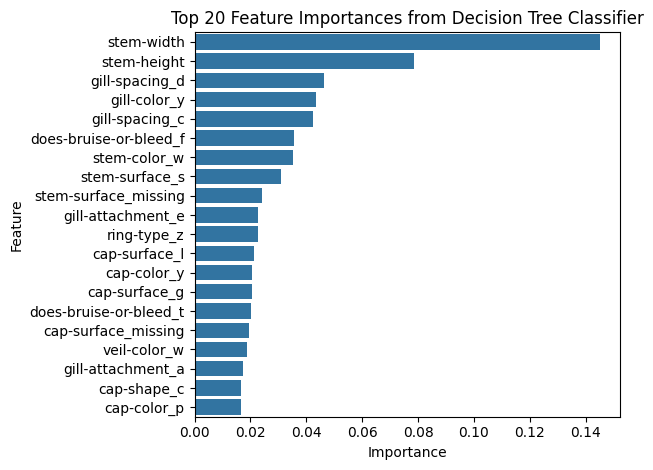

In [38]:
# Get feature names after one-hot encoding
ohe = preprocessor.named_transformers_['categorical'].named_steps['encoder']
ohe_feature_names = ohe.get_feature_names_out(categorical)
feature_names = np.concatenate([numerical, ohe_feature_names])

# Get feature importances from the decision tree model
feature_importances = model.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 feature by importance
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Feature Importances from Decision Tree Classifier')
plt.tight_layout()
plt.show()

del importance_df

It does seem that, as our exploration suggested, `stem-width` is a very important feature for the model, followed by `stem-height` and others (mostly related to gill, stem and cap).

### Random Forest Classifier
We'll now try a Random Forest Classifier, which is an ensemble model that combines multiple Decision Trees; this usually leads to better performance and generalization compared to a single Decision Tree, but takes more computational resources and is less interpretable. We'll use the `RandomForestClassifier` class from `sklearn` to implement it.

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators = 100, random_state = 42))
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print(f"Training MCC: {matthews_corrcoef(y_train, y_pred_train):.2f}\n")

print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))
print(f"Validation MCC: {matthews_corrcoef(y_valid, y_pred_valid):.2f}")

Training Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00    268194
           p       1.00      1.00      1.00    324025

    accuracy                           1.00    592219
   macro avg       1.00      1.00      1.00    592219
weighted avg       1.00      1.00      1.00    592219

Training MCC: 1.00

Validation Classification Report:
              precision    recall  f1-score   support

           e       0.99      0.99      0.99     70578
           p       0.99      0.99      0.99     85270

    accuracy                           0.99    155848
   macro avg       0.99      0.99      0.99    155848
weighted avg       0.99      0.99      0.99    155848

Validation MCC: 0.98


### LightGBM Classifier
We'll use the *lgb* (Light Gradient Boosting Machine) implementation from the `lightgbm` library, which is optimized for speed and performance.

In [40]:
import lightgbm as lgb

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMClassifier(n_estimators = 100, random_state = 42))
])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))
print(f"Training MCC: {matthews_corrcoef(y_train, y_pred_train):.2f}\n")

print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))
print(f"Validation MCC: {matthews_corrcoef(y_valid, y_pred_valid):.2f}")

[LightGBM] [Info] Number of positive: 324025, number of negative: 268194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.355159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 592219, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547137 -> initscore=0.189110
[LightGBM] [Info] Start training from score 0.189110


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Classification Report:
              precision    recall  f1-score   support

           e       0.99      0.99      0.99    268194
           p       0.99      0.99      0.99    324025

    accuracy                           0.99    592219
   macro avg       0.99      0.99      0.99    592219
weighted avg       0.99      0.99      0.99    592219

Training MCC: 0.98

Validation Classification Report:
              precision    recall  f1-score   support

           e       0.99      0.99      0.99     70578
           p       0.99      0.99      0.99     85270

    accuracy                           0.99    155848
   macro avg       0.99      0.99      0.99    155848
weighted avg       0.99      0.99      0.99    155848

Validation MCC: 0.98


## Model Tuning
We'll use the `RandomizedSearchCV` method to try different hyperparameters combinations for our LightGBM model and find the best hyperparameters:

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMClassifier(random_state = 42))
])

param_distributions = {
    # Tree complexity
    'model__num_leaves': randint(20, 200),
    'model__max_depth': randint(3, 15),

    # Learning & regularization
    'model__learning_rate': uniform(0.01, 0.3),
    'model__min_child_samples': randint(10, 100),
    'model__min_child_weight': uniform(1e-3, 0.1),

    # Subsampling
    'model__subsample': uniform(0.5, 0.5),
    'model__colsample_bytree': uniform(0.5, 0.5),

    # Regularization
    'model__reg_alpha': uniform(0.0, 1.0),
    'model__reg_lambda': uniform(0.0, 1.0),

    # Feature and data bagging
    'model__bagging_freq': randint(0, 10),
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='matthews_corrcoef',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print("Best parameters Cross-Validated MCC score: ", random_search.best_score_)
print("Best parameters found: ", best_params)

del random_search
del param_distributions


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 324025, number of negative: 268194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.230944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 592219, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547137 -> initscore=0.189110
[LightGBM] [Info] Start training from score 0.189110
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

Now that we have a good hyperparameters combination, we want to find an optimal number of boosting rounds to be sure to not overfit. We'll implement an early stopping technique to automatically find the optimal number of boosting rounds:

In [42]:
from sklearn.base import clone
preproc = clone(preprocessor)
preproc.fit(X_train, y_train)
X_valid_enc = preproc.transform(X_valid)

del X_valid


In [43]:
best_params = {k.replace('model__', ''): v for k, v in best_params.items()} # Remove "model__" from the params


model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMClassifier(**best_params, random_state=42))
])

fit_params = {
    "model__eval_set" : [(X_valid_enc, y_valid)],
    "model__eval_metric" : 'matthews_corrcoef',
    "model__callbacks" : [lgb.early_stopping(100)]
}

model.fit(X_train, y_train, **fit_params)

best_iter = model.named_steps['model'].best_iteration_

del X_valid_enc
del y_valid

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 324025, number of negative: 268194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.231728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 592219, number of used features: 118
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547137 -> initscore=0.189110
[LightGBM] [Info] Start training from score 0.189110
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive ga

## Training on Full Dataset
We will now train our LightGBM tuned model on the full training dataset (before doing so, we'll delete some variables to free-up some RAM usage):

In [44]:
X = train_full.drop(columns = 'class')
y = train_full['class']

del train_full

best_iter = model.named_steps['model'].best_iteration_

model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMClassifier(
        **best_params,
        random_state=42,
        n_estimators=best_iter
    ))
])

model.fit(X, y)

y_pred = model.predict(X)

print("Training Classification Report:")
print(classification_report(y, y_pred))
print(f"Final Training MCC: {matthews_corrcoef(y, y_pred):.2f}\n")

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 1705396, number of negative: 1411549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.224795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 3116945, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547137 -> initscore=0.189110
[LightGBM] [Info] Start training from score 0.189110
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Training Classification Report:
              precision    recall  f1-score   support

           e       0.99      0.99      0.99   1411549
           p       0.99      0.99      0.99   1705396

    accuracy                           0.99   3116945
   macro avg       0.99      0.99      0.99   3116945
weighted avg       0.99      0.99      0.99   3116945

Final Training MCC: 0.98



## Predictions on Test Set
We'll now use our best model (the Decision Tree Classifier) to make predictions on the test set. The prediction will be saved in a CSV file in the required submission format for the Kaggle competition.

In [48]:
y_test_pred = model.predict(test)
submission = pd.DataFrame({
    'id': test.index,
    'class': y_test_pred
})
submission.to_csv(f'{DIR_PATH}/submission.csv', index = False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
